Aidira Puti Nabilla (2024962097)

#7.1. From Fully Connected Layers to Convolutions

## Exercises

1. Assume that the size of the convolution kernel is $\Delta = 0$.
   Show that in this case the convolution kernel
   implements an MLP independently for each set of channels. This leads to the Network in Network
   architectures :cite:`Lin.Chen.Yan.2013`.
   
   When the convolution kernel size Δ=0, the operation effectively becomes a pointwise convolution, allowing the network to behave like an MLP that operates independently on each set of input channels. This forms the basis for the Network in Network architecture, enabling more expressive feature learning.
1. Audio data is often represented as a one-dimensional sequence.
    1. When might you want to impose locality and translation invariance for audio?
      - Locality: Certain sounds can occur in short time frames, and local patterns can represent significant audio features (e.g., certain words etc.).
      - Translation Invariance: Essential when recognizing patterns or features in audio regardless of their position in the audio sequence. For example, a particular words can occur at different times, and you want to recognize it regardless of when it appears.
    1. Derive the convolution operations for audio.
    
      For a one-dimensional audio signal x(t) and a convolution kernel w(t), the convolution operation can be defined as:
      
      (y∗w)(t)=∫[−∞,∞] (x(τ)w(t−τ))dτ
      
      In discrete terms, if we consider a sampled audio signal:
      
      y[n]=(x∗w)[n]= ∑[m=−∞, ∞] x[m]w[n−m]

      This operation allows us to apply a filter (or kernel) to the audio signal, producing a new sequence y[n] that captures features according to the kernel’s weights.

    1. Can you treat audio using the same tools as computer vision? Hint: use the spectrogram.
    
    Yes, audio can be treated similarly to images in computer vision using a spectrogram, which represents the audio signal in the time-frequency domain.

1. Why might translation invariance not be a good idea after all? Give an example.

 In speech recognition, the position of phonemes is crucial. If the system is too invariant to translation, it might overlook subtle but critical distinctions in timing that affect meaning

1. Do you think that convolutional layers might also be applicable for text data?
   Which problems might you encounter with language?

    Convolutional layers can also be applicable for text data, especially for tasks like text classification or sentiment analysis. However, some challenges include:

    Variable Lengths: Text data comes in variable lengths, and padding or truncating may be necessary.

    Word Order: The order of words in sentences is crucial in language, and convolutions might not capture this well unless designed carefully (e.g., by using n-grams).


1. What happens with convolutions when an object is at the boundary of an image?

  When an object is at the boundary of an image, convolution operations can produce artifacts or reduced output sizes, particularly if no padding is used. This can lead to:

  Loss of Information: Important features at the edges might not be fully captured.

  Dimensionality Reduction: The output size may be smaller than the input size, affecting the network architecture.

1. Prove that the convolution is symmetric, i.e., $f * g = g * f$.

  1. **Convolution Definition**:
    $[
    (f * g)(t) = \int_{-\infty}^{\infty} f(τ) g(t - τ) \, d\tau
    $]

  2. **Changing the Variable**:
    Let $( u = t - \tau $). Then, $( τ = t - u $) and $( d\tau = -du $). The limits remain the same, so:
    $[
    (f * g)(t) = \int_{-\infty}^{\infty} f(t - u) g(u) (-du) = \int_{-\infty}^{\infty} f(t - u) g(u) \, du
    $]

  3. **Rearranging the Integral**:
    $[
    (f * g)(t) = \int_{-\infty}^{\infty} g(u) f(t - u) \, du = (g * f)(t)
    $]

  Thus, we have shown that $( (f * g)(t) = (g * f)(t) $), proving that convolution is symmetric.


##Discussion Points:
- Translation Invariance: The network's earliest layers respond similarly to the same image patch, regardless of its position.
- Locality Principle: Early layers focus on local regions of the image without considering distant areas (just like how human vision works).
- Aggregation of Local Representations:
  Local features from early layers are combined to make predictions for the entire image.
- Deeper Layers:
  As the network progresses, deeper layers capture longer-range features, resembling higher-level vision in nature.

# 7.2. Convolutions for Images

In [ ]:
!pip install d2l==1.0.3

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
# The Cross-Correlation Operation
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [ ]:
# Convolutional Layers
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [ ]:
# Object Edge Detection in Images
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
K = torch.tensor([[1.0, -1.0]])
K

tensor([[ 1., -1.]])

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
# Learning a Kernel
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
learning_rate = 3e-2
for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= learning_rate * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 11.771
epoch 4, loss 3.374
epoch 6, loss 1.139
epoch 8, loss 0.426
epoch 10, loss 0.168


In [ ]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9456, -1.0290]])

## Exercises

1. Construct an image `X` with diagonal edges.
    1. What happens if you apply the kernel `K` in this section to it?
    1. What happens if you transpose `X`?
    1. What happens if you transpose `K`?
1. Design some kernels manually.
    1. Given a directional vector v = (v_1, v_2), derive an edge-detection kernel that detects edges orthogonal to v, i.e., edges in the direction (v_2, -v_1).
    
    1. Derive a finite difference operator for the second derivative. What is the minimum size of the convolutional kernel associated with it? Which structures in images respond most strongly to it?
    1. How would you design a blur kernel? Why might you want to use such a kernel?
    1. What is the minimum size of a kernel to obtain a derivative of order $d$?
1. When you try to automatically find the gradient for the `Conv2D` class we created, what kind of error message do you see?
1. How do you represent a cross-correlation operation as a matrix multiplication by changing the input and kernel tensors?

In [ ]:
#1)
X = torch.tensor([[1, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1]])

K = torch.tensor([[1.0, -1.0]])
print(corr2d(X, K))

''' it detects the diagonal edges '''

# Transpose X
X_transposed = X.T
print(corr2d(X_transposed, K))

''' no changes, it still detects the diagonal edges '''

# Transpose K
K_transposed = K.T
print(corr2d(X, K_transposed))

''' the output get transposed, changes from detecting horizontal edges to detecting vertical edges. '''


tensor([[ 1.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0., -1.,  1.,  0.],
        [ 0.,  0., -1.,  1.],
        [ 0.,  0.,  0., -1.]])
tensor([[ 1.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0., -1.,  1.,  0.],
        [ 0.,  0., -1.,  1.],
        [ 0.,  0.,  0., -1.]])
tensor([[ 1., -1.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.],
        [ 0.,  0.,  0.,  1., -1.]])


In [ ]:
#2)
#2.1)
p = torch.roll(X, shifts=(1,),dims=(1,))+torch.roll(X, shifts=(2,),dims=(1,))+X
Y = X+torch.roll(X, shifts=(2,),dims=(1,))
conv2d = nn.LazyConv2d(1, kernel_size=(3, 3), bias=False,padding=1) #bias ignored

train_X = p.reshape((1, 1, p.shape[0], p.shape[1]))
train_Y = Y.reshape((1, 1, Y.shape[0], Y.shape[1]))
lr = 1e-2

# training
for i in range(16):
    Y_hat = conv2d(train_X)
    l = (Y_hat - train_Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')
conv2d.weight.data.squeeze()

corr2d(p,conv2d.weight.data.squeeze())

# helper
import torch.nn.functional as F
import torchvision.transforms.functional as tF
import math

def stat_theta(r):
    v = [1,0]
    theta = math.acos(F.cosine_similarity(torch.tensor(r).type(torch.float32),torch.tensor(v).type(torch.float32),dim=0))/math.pi*180
    return theta

def gen_K(v):
    v = torch.tensor(v, dtype=torch.float32)
    u = v / torch.norm(v)
    K = torch.tensor([[-u[1], u[0]],[-u[0], -u[1]]], dtype=torch.float32)
    return K

def test(r,a):
    theta = stat_theta(r)
    K = gen_K(r)
    print(K)
    b = tF.rotate(a.reshape(1,1,a.shape[0],-1,),angle=theta).reshape(a.shape[0],-1)
    print(b)
    print(corr2d(b,K))

# test
a = torch.ones((6, 8))
a[:, 2:6] = 0
test([1,0],a)


epoch 2, loss 61564.938
epoch 4, loss 3609764352.000
epoch 6, loss 211699172900864.000
epoch 8, loss 12415369741009420288.000
epoch 10, loss 728115254385873722015744.000
epoch 12, loss 42701248065077990571257102336.000
epoch 14, loss 2504269757491692175642510063828992.000
epoch 16, loss 146866084037389153685016211555365158912.000
tensor([[-0.,  1.],
        [-1., -0.]])
tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.]])


2.2)
Central Difference Formula:
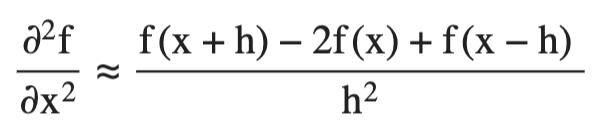


Discrete form of that can be expressed by K = [1 −2 1]



In [ ]:
K = torch.tensor([[1,-2,1]])
print(a)
corr2d(a,K)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


tensor([[-1.,  1.,  0.,  0.,  1., -1.],
        [-1.,  1.,  0.,  0.,  1., -1.],
        [-1.,  1.,  0.,  0.,  1., -1.],
        [-1.,  1.,  0.,  0.,  1., -1.],
        [-1.,  1.,  0.,  0.,  1., -1.],
        [-1.,  1.,  0.,  0.,  1., -1.]])

In [ ]:
#2.3) Gaussian Blur Kernel
import numpy as np
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2) / (2*sigma**2)),
        (size, size)
    )
    kernel /= np.sum(kernel)
    return kernel

kernel_size = 3
sigma = 1.0
blur_kernel = torch.tensor(gaussian_kernel(kernel_size, sigma))

print(f"Blur kernel sum:{blur_kernel.sum()}")
print(blur_kernel)
print(a)
corr2d(a,blur_kernel)

Blur kernel sum:1.0
tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]], dtype=torch.float64)
tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


tensor([[0.7259, 0.2741, 0.0000, 0.0000, 0.2741, 0.7259],
        [0.7259, 0.2741, 0.0000, 0.0000, 0.2741, 0.7259],
        [0.7259, 0.2741, 0.0000, 0.0000, 0.2741, 0.7259],
        [0.7259, 0.2741, 0.0000, 0.0000, 0.2741, 0.7259]])

A blur kernel is used to reduce noise, smooth textures, and create a cleaner image by softening fine details, while sometimes preserving edges. It's useful for preprocessing in tasks like object detection, privacy protection, or creating artistic effects.

2.4 2d+1

In [ ]:
#3)
x = p
custom_conv2d = Conv2D(kernel_size=(3, 3))
x.requires_grad = True
o = custom_conv2d(x)
o.backward()

print("Gradient of weight:", custom_conv2d.weight.grad)
print("Gradient of bias:", custom_conv2d.bias.grad)

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
#4)

'''
- Flatten and reshape the input tensor X into matrix A where each column represents a patch of the image that corresponds to the kernel size.
- Flatten the kernel K into a vector.
'''
def corr2d_matmul(pic, K):
    pad_K = F.pad(K,(0,pic.shape[1]-K.shape[1],0,pic.shape[0]-K.shape[0])).type(torch.float32)
    l = []
    for i in range(pic.shape[0]-K.shape[0]+1):
        for j in range(pic.shape[1]-K.shape[1]+1):
            l.append(torch.roll(pad_K,(i,j),(0,1)).reshape(1,-1))
    print(torch.cat(l,dim=0))
    return (torch.cat(l,dim=0)@pic.reshape(-1,1)).reshape(pic.shape[0]-K.shape[0]+1,pic.shape[1]-K.shape[1]+1)

K = torch.tensor([[1,1],[1,1]])
x = torch.ones(3,3)
(corr2d_matmul(x,K) == corr2d(x,K)).all()

tensor([[1., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 1., 1.]])


tensor(True)

## Discussion Points
- Convolutional layers use cross-correlation operations for computation.
- Multiple input/output channels involve matrix-matrix operations.
- The process is straightforward and local, allowing hardware optimization.
- Optimizing for convolutions focuses on fast computation, not memory, making computer vision more accessible.
- Convolutions can detect edges, blur, or sharpen images, among other tasks.
- Filters don't need to be hand-crafted; they can be learned from data, replacing manual feature engineering.
- These filters resemble brain functions, reinforcing their effectiveness in deep networks.

# 7.3. Padding and Stride

In [ ]:
import torch
from torch import nn

In [ ]:
# Padding
def comp_conv2d(conv2d, X):
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
# top-bottom padding = 2, left-right padding = 1
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
# Stride
# Height-width stride = 2
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

## Exercises

1. Given the final code example in this section with kernel size $(3, 5)$, padding $(0, 1)$, and stride $(3, 4)$,
   calculate the output shape to check if it is consistent with the experimental result.

   $h_o = ⌊((8 - 3 + 2*0)/3)⌋ + 1 = 2$
   
   $w_o = ⌊((8 - 5 + 2*1)/3)⌋ + 1 = 2$

1. For audio signals, what does a stride of 2 correspond to?

    A stride of 2 in audio signals corresponds to downsampling by a factor of 2, effectively halving the temporal resolution of the signal. This reduces the amount of data but retains key features of the signal.

1. Implement mirror padding, i.e., padding where the border values are simply mirrored to extend tensors.

    (code)

1. What are the computational benefits of a stride larger than 1?

    Larger strides reduce the computational complexity by decreasing the number of operations. Since fewer convolutions are performed across the input tensor, the processing time is reduced.

1. What might be statistical benefits of a stride larger than 1?

    Larger strides help reduce overfitting by aggregating broader regions of the input, focusing on more general features rather than fine details. This leads to better generalization in the model.

1. How would you implement a stride of $\frac{1}{2}$? What does it correspond to? When would this be useful?

    A stride of $\frac{1}{2}$ would involve interpolating between the original data points, effectively upsampling the input. This could be useful when increased spatial or temporal resolution is required without losing continuity in the data.

In [ ]:
#3)
import torch
import torch.nn.functional as F

# Example tensor
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]], dtype=torch.float32)

padded_X = F.pad(X.unsqueeze(0).unsqueeze(0), (1, 1, 1, 1), mode='reflect')
padded_X = padded_X.squeeze(0).squeeze(0)

print(padded_X)


tensor([[5., 4., 5., 6., 5.],
        [2., 1., 2., 3., 2.],
        [5., 4., 5., 6., 5.],
        [8., 7., 8., 9., 8.],
        [5., 4., 5., 6., 5.]])


## Discussion Points
- Padding
  - Padding increases the height by $p_\textrm{h}$ and the width by $p_\textrm{w}$.
  - For equal input and output dimensions, set $p_\textrm{h} = k_\textrm{h} - 1$ and $p_\textrm{w} = k_\textrm{w} - 1$.
  - With odd kernel sizes, pad evenly on both sides of height and width.
  - For even kernel sizes, pad unevenly, e.g., $\lceil p_\textrm{h}/2\rceil$ on top and $\lfloor p_\textrm{h}/2\rfloor$ on bottom.
  - Odd kernel sizes like 1, 3, 5, and 7 are preferred to maintain symmetry and simplify output prediction.
  - Centering the kernel on input elements helps compute the output.
- Stride
  - Stride refers to how many rows and columns the window moves at each step.
  - Larger strides can be used for computational efficiency or downsampling.
  - The output shape with strides $(s_\text{h}) (height) and (s_\text{w})(width)$ is given by:  
      $[
      \left\lfloor\frac{n_\text{h}-k_\text{h}+p_\text{h}+s_\text{h}}{s_\text{h}}\right\rfloor \times \left\lfloor\frac{n_\text{w}-k_\text{w}+p_\text{w}+s_\text{w}}{s_\text{w}}\right\rfloor.
      $]
  - Setting $(p_\text{h} = k_\text{h} - 1)$ and $(p_\text{w} = k_\text{w} - 1$) simplifies the output shape to:  
      $[
      \left\lfloor\frac{n_\text{h}+s_\text{h}-1}{s_\text{h}}\right\rfloor \times \left\lfloor\frac{n_\text{w}+s_\text{w}-1}{s_\text{w}}\right\rfloor.
      $]
  - If the input dimensions are divisible by the strides, the output shape will be:  
      $[
      \left(\frac{n_\text{h}}{s_\text{h}}\right) \times \left(\frac{n_\text{w}}{s_\text{w}}\right).
      $]

#7.4 Multiple Input and Multiple Output Channels

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [ ]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [ ]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [ ]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [ ]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

## Exercises

1. Assume that we have two convolution kernels of size $k_1$ and $k_2$, respectively
   (with no nonlinearity in between).
    1. Prove that the result of the operation can be expressed by a single convolution.
    Assume we have two convolution kernels \( K_1 \) of size \( k_1 \) and \( K_2 \) of size \( k_2 \). The operation of convolving an input \( I \) with these kernels can be expressed as follows:

      1. Convolve the Input with the First Kernel:
        $[
        Y_1 = I * K_1
        $]

      2. Convolve the Result with the Second Kernel:
        $[
        Y_2 = Y_1 * K_2 = (I * K_1) * K_2
        $]

      Using the associative property of convolution, we can rearrange the operations:
      $[
      Y_2 = I * (K_1 * K_2)
      $]
      Thus, the result of convolving with two kernels can be expressed as a single convolution with the combined kernel $( K = K_1 * K_2 $).

    1. What is the dimensionality of the equivalent single convolution?
    
    If the input $( I $) has a spatial dimension of $( (h, w) $) and $( K_1 $) and $( K_2 $) have sizes $( k_1 $) and $( k_2 $) respectively, the equivalent single convolution kernel $( K $) will have a size $( k_1 + k_2 - 1 $). The output dimension after applying this kernel will be:
    
    $
    \text{Output Dimension} = (h - (k_1 + k_2 - 1) + 1) \times (w - (k_1 + k_2 - 1) + 1) = (h - k + 1) \times (w - k + 1)
    $
    
    where $( k = k_1 + k_2 - 1 $).

    1. Is the converse true, i.e., can you always decompose a convolution into two smaller ones?
    
    No, the converse is not necessarily true. Not every convolution can be decomposed into two smaller convolutions. For example, a convolution with a non-separable kernel (such as a Gaussian kernel in two dimensions) cannot be expressed as the composition of two smaller convolutions. The composition is dependent on the specific properties of the kernels involved.

1. Assume an input of shape $c_\textrm{i}\times h\times w$ and a convolution kernel of shape
   $c_\textrm{o}\times c_\textrm{i}\times k_\textrm{h}\times k_\textrm{w}$, padding of $(p_\textrm{h}, p_\textrm{w})$, and stride of $(s_\textrm{h}, s_\textrm{w})$.
    1. What is the computational cost (multiplications and additions) for the forward propagation?

      For an input of shape $ c_i \times h \times w $ and a kernel of shape $ c_o \times c_i \times k_h \times k_w $:

      - **Total Multiplications**:
      $$
      \text{Total Multiplications} = c_o \times h_{out} \times w_{out} \times c_i \times k_h \times k_w
      $$
      Where $ h_{out} = \frac{h + 2p_h - k_h}{s_h} + 1 $ and $ w_{out} = \frac{w + 2p_w - k_w}{s_w} + 1 $.

      - **Total Additions**: Each multiplication corresponds to an addition, so the total additions is the same as the multiplications:
      $$
      \text{Total Additions} = \text{Total Multiplications}
      $$

    1. What is the memory footprint?
          
        1. **Input Size**: $ c_i \times h \times w $
        2. **Kernel Size**: $ c_o \times c_i \times k_h \times k_w $
        3. **Output Size**: $ c_o \times h_{out} \times w_{out} $

        Thus, the total memory footprint is:
        $$
        \text{Memory Footprint} = c_i \times h \times w + c_o \times c_i \times k_h \times k_w + c_o \times h_{out} \times w_{out}
        $$

    1. What is the memory footprint for the backward computation?
          
          The memory footprint for the backward pass is similar to the forward pass, as you need to store the input, kernel, and gradients with respect to the output.
          
          Thus, it remains:
          $$
          \text{Memory Footprint for Backpropagation} = c_i \times h \times w + c_o \times c_i \times k_h \times k_w + c_o \times h_{out} \times w_{out}
          $$

    1. What is the computational cost for the backpropagation?

      The computational cost for backpropagation consists of calculating the gradients for both the input and the kernel, which would involve the same number of multiplications and additions as the forward pass.
      
      Thus:
      $$
      \text{Total Multiplications (Backpropagation)} = \text{Total Additions (Backpropagation)} = c_o \times h_{out} \times w_{out} \times c_i \times k_h \times k_w
      $$

1. By what factor does the number of calculations increase if we double both the number of input channels
   $c_\textrm{i}$ and the number of output channels $c_\textrm{o}$? What happens if we double the padding?
    
    When we double both the input channels $ c_i $ and the output channels $ c_o $:

    - **New Computations**: The computational cost increases by a factor of $ 2 \times 2 = 4 $.
    - **Doubling Padding**: Doubling padding increases the spatial dimensions $ h_{out} $ and $ w_{out} $ as it adds more effective area for convolution, which may lead to an increase in computational cost, but the factor is more complex and depends on the kernel size and stride.

1. Are the variables `Y1` and `Y2` in the final example of this section exactly the same? Why?

    If `Y1` is obtained by convolving the input with the first kernel and `Y2` is obtained by convolving `Y1` with the second kernel, they will not be exactly the same if there is any difference in the convolution parameters (e.g., padding, stride). However, if both are computed correctly without any parameters changing, they can be equal since $ Y_2 = I * (K_1 * K_2) $.

1. Express convolutions as a matrix multiplication, even when the convolution window is not $1 \times 1$.

    Convolutions can be expressed as matrix multiplications through a technique known as the **im2col** transformation. This involves rearranging the input into a matrix where each row corresponds to a region covered by the kernel, effectively flattening the spatial and channel dimensions into a 2D matrix. The kernel is also reshaped into a matrix form, and the convolution can then be expressed as:
    $$
    Y = W \cdot X
    $$
    where $ W $ is the reshaped kernel matrix, and $ X $ is the reshaped input matrix.


1. Your task is to implement fast convolutions with a $k \times k$ kernel. One of the algorithm candidates
   is to scan horizontally across the source, reading a $k$-wide strip and computing the $1$-wide output strip
   one value at a time. The alternative is to read a $k + \Delta$ wide strip and compute a $\Delta$-wide
   output strip. Why is the latter preferable? Is there a limit to how large you should choose $\Delta$?
    
    #### Why is reading a $ k + \Delta $ wide strip preferable?

    Reading a $ k + \Delta $ wide strip allows for more parallel processing as it computes multiple output values simultaneously. This leads to reduced overall computational time and improved cache coherence, minimizing memory access latency.

    #### Is there a limit to how large you should choose $ \Delta $?

    Yes, choosing $ \Delta $ too large can lead to diminishing returns due to increased memory usage and potential cache thrashing. The optimal size for $ \Delta $ balances the benefits of parallelism with the overhead of memory management.

1. Assume that we have a $c \times c$ matrix.
    1. How much faster is it to multiply with a block-diagonal matrix if the matrix is broken up into $b$ blocks?

    If a $ c \times c $ matrix is broken into $ b $ blocks, the computation can be reduced to multiplying smaller matrices:
    $$
    O(b \cdot (c/b)^2) \text{ instead of } O(c^3)
    $$
    This results in a significant speedup, particularly when $ b $ is small compared to $ c $.

    1. What is the downside of having $b$ blocks? How could you fix it, at least partly?

    The downside of having $ b $ blocks is that it increases overhead in terms of managing multiple smaller matrix operations rather than one larger operation. This could lead to increased constant factors in computation time and additional memory overhead for storing intermediate results. To address the downsides, we could utilize techniques such as matrix caching, optimizing the size of blocks to balance performance, and using efficient linear algebra libraries that handle block operations more efficiently, thereby reducing overhead.

## Discussion Points
- Input and Output Channels: When dealing with multi-channel inputs (e.g., RGB images), both inputs and convolution kernels become three-dimensional tensors, requiring the kernel to match the input channel count.
- Cross-Correlation: The convolution process involves performing cross-correlation for each input channel, summing the results to produce a two-dimensional output tensor.
- Multiple Output Channels: To achieve multiple output channels, each output channel has its own kernel that processes all input channels, allowing the network to learn diverse features.
- 1x1 Convolution: The 1x1 convolution performs linear combinations across channels while maintaining spatial dimensions, functioning similarly to fully connected layers applied at each pixel.
- Computational Cost: The computation cost of convolutions increases significantly with the size of the input and output channels, necessitating strategies to optimize performance in deep learning architectures.




#7.5. Pooling


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [ ]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
# Padding and Stride
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
# Multiple Channels
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Exercises

1. Implement average pooling through a convolution.
   - Average pooling can be achieved using a convolution operation by using a kernel where all elements are set to $\frac{1}{N}$, where $N$ is the number of elements in the pooling window. For example, for a $2 \times 2$ average pooling, the convolution kernel would be:
   $$
   \text{Kernel} = \begin{bmatrix}
   \frac{1}{4} & \frac{1}{4} \\
   \frac{1}{4} & \frac{1}{4}
   \end{bmatrix}
   $$

1. Prove that max-pooling cannot be implemented through a convolution alone.

    Max-pooling selects the maximum value from a set of values, while convolution is a linear operation that computes a weighted sum of inputs. Since the max operation is nonlinear, it cannot be represented as a single convolution layer.

1. Max-pooling can be accomplished using ReLU operations, i.e., $\textrm{ReLU}(x) = \max(0, x)$.
    1. Express $\max (a, b)$ by using only ReLU operations.

    $$
    \max(a, b) = \frac{1}{2}(a + b + \textrm{ReLU}(a - b))
    $$

    1. Use this to implement max-pooling by means of convolutions and ReLU layers.
    
    (code)
    
    1. How many channels and layers do you need for a $2 \times 2$ convolution? How many for a $3 \times 3$ convolution?
      - For a $2 \times 2$ convolution, we would need 2 channels (one for each value) and 1 layer.
      - For a $3 \times 3$ convolution, we would need 3 channels (to capture the maximum from the neighborhood) and 1 layer.

1. What is the computational cost of the pooling layer? Assume that the input to the pooling layer is of size $c\times h\times w$, the pooling window has a shape of $p_\textrm{h}\times p_\textrm{w}$ with a padding of $(p_\textrm{h}, p_\textrm{w})$ and a stride of $(s_\textrm{h}, s_\textrm{w})$.

    - Given an input of size $c \times h \times w$, the computational cost of the pooling layer with a window size of $p_\textrm{h} \times p_\textrm{w}$, padding $(p_\textrm{h}, p_\textrm{w})$, and stride $(s_\textrm{h}, s_\textrm{w})$ can be calculated as:
      $$
      \text{Cost} = c \cdot \left( \left\lceil \frac{h + 2 \cdot p_\textrm{h} - p_\textrm{h}}{s_\textrm{h}} \right\rceil \cdot \left\lceil \frac{w + 2 \cdot p_\textrm{w} - p_\textrm{w}}{s_\textrm{w}} \right\rceil \right)
      $$
      where each output requires evaluating $p_\textrm{h} \times p_\textrm{w}$ elements.

1. Why do you expect max-pooling and average pooling to work differently?

    Max-pooling focuses on the most significant features by taking the maximum value, making it robust to noise. Average pooling, however, averages values, which can smooth out important features and may lead to loss of critical information.

1. Do we need a separate minimum pooling layer? Can you replace it with another operation?

    A separate minimum pooling layer is not strictly necessary. You can achieve similar results using negative max-pooling, where you negate the input values, apply max-pooling, and negate the output.

1. We could use the softmax operation for pooling. Why might it not be so popular?

    Softmax outputs a probability distribution, which can lose the actual values of the features and does not effectively retain spatial information. Additionally, it is computationally more expensive and not suited for tasks where retaining maximum or average values is critical.

In [ ]:
import torch
import torch.nn as nn

class MaxPoolingWithReLU(nn.Module):
    def __init__(self):
        super(MaxPoolingWithReLU, self).__init__()
        # Using a 2x2 kernel with stride 2 and padding 0
        self.conv = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=2, stride=2, padding=0, bias=False)

        # Initialize weights manually to simulate max-pooling
        # Each input value is treated as separate channels
        with torch.no_grad():
            self.conv.weight = nn.Parameter(torch.tensor([[[[1.0, 0.0], [0.0, 0.0]]],
                                                          [[[0.0, 1.0], [0.0, 0.0]]],
                                                          [[[0.0, 0.0], [1.0, 0.0]]],
                                                          [[[0.0, 0.0], [0.0, 1.0]]]], dtype=torch.float32))

    def forward(self, x):
        x = self.conv(x)  # Perform convolution
        return nn.ReLU()(x)  # Apply ReLU activation

# Example usage
input_tensor = torch.randn(1, 1, 4, 4)  # Batch size 1, 1 channel, 4x4 image
pool = MaxPoolingWithReLU()
output_tensor = pool(input_tensor)
print(output_tensor)


tensor([[[[0.0000, 0.0089],
          [0.0000, 0.0000]],

         [[0.0000, 1.7169],
          [0.0000, 0.0000]],

         [[0.0000, 0.0000],
          [0.0000, 0.2052]],

         [[1.2319, 0.0000],
          [0.0777, 0.5081]]]], grad_fn=<ReluBackward0>)


## Discussion Points
- Pooling aggregates values over a defined window, reducing the spatial resolution of the output.
- Definition: Pooling aggregates values over a defined window, reducing the spatial resolution of the output.
Channel Independence: Pooling operates on each channel separately, maintaining the number of channels in the output.
- Types of Pooling:
    - Max-Pooling: Preferred over average pooling as it offers some invariance to output.
    - Average Pooling: Commonly uses a pooling window size to quarter the spatial resolution of the output.
- Alternative Methods:
    - Stochastic Pooling: Introduces randomness during aggregation, which can enhance accuracy.
    - Fractional Max-Pooling: Similar to stochastic pooling but with a focus on fractional output sizes.
- Advanced Techniques: Methods like attention mechanisms use alignment between query and representation vectors for more refined output aggregation.



#7.6. Convolutional Neural Networks (LeNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


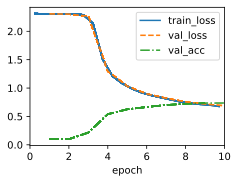

In [ ]:
# training
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

## Exercises

1. Let's modernize LeNet. Implement and test the following changes:
    1. Replace average pooling with max-pooling.
    1. Replace the softmax layer with ReLU.
1. Try to change the size of the LeNet style network to improve its accuracy in addition to max-pooling and ReLU.
    1. Adjust the convolution window size.
    1. Adjust the number of output channels.
    1. Adjust the number of convolution layers.
    1. Adjust the number of fully connected layers.
    1. Adjust the learning rates and other training details (e.g., initialization and number of epochs).
1. Try out the improved network on the original MNIST dataset.
1. Display the activations of the first and second layer of LeNet for different inputs (e.g., sweaters and coats).
1. What happens to the activations when you feed significantly different images into the network (e.g., cats, cars, or even random noise)?

## Discussion Points
- LeNet-5's architecture remains relevant and can be compared to modern models like ResNet.
- Error Rate Comparison: LeNet-5 performs better than MLPs and is closer in performance to advanced architectures.
- Computational Complexity: Increased computation allows for more complex architectures.
- Ease of Implementation: Developing models has become much simpler, shifting from months of coding to minutes.


#8.2. Networks Using Blocks (VGG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
# Training
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=3, num_gpus=1)
data = d2l.FashionMNIST(batch_size=512, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Discussion points
- VGG is Considered the first truly modern convolutional neural network.
Key Features: Introduced multiple convolution blocks and favored deep, narrow networks.
- Model Family: VGG is a family of similarly parameterized models, allowing flexibility in complexity and speed.
- Framework Advancements: Modern deep learning frameworks simplify network assembly using Python instead of XML configuration.


#8.6. (.1~.4) Residual Networks (ResNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Residual(nn.Module):
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


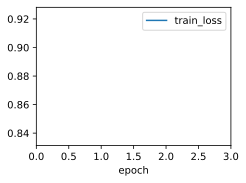

In [ ]:
# training
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=3, num_gpus=1)
data = d2l.FashionMNIST(batch_size=512, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Discusion Points
- ResNet (Residual Network) improves deep learning models by using residual blocks to make training deep networks easier.
- Key Idea: Every additional layer should ideally learn an identity function, simplifying the learning process.
- Residual Block: Contains two convolutional layers and a shortcut connection that adds the input directly to the output.This  helps prevent issues like vanishing gradients in deep networks.
- Larger function classes don’t always guarantee better results; nested classes are preferable.
- Design Features:
  - Uses batch normalization and ReLU activation functions after convolutional layers.
  - The first two layers consist of a convolutional layer followed by max pooling.
  - Several modules made of residual blocks are stacked to form deeper networks like ResNet-18 (18 layers) or ResNet-152 (152 layers).
